In [1]:
import pandas as pd

### <span style="color:blue"> 1.Create a Datatime index containing all the weekdays days of year 2019 and assign a random number to each of them in a dataframe.</span>

### <span style="color:blue"> 2. Given Pandas series , height = [23,42,55] and weight = [71,32,48] . Create a dataframe with height and weight as column names. </span>

In [21]:
dict={'height':[23,42,55],'weight':[71,32,48]}

In [22]:
data = pd.DataFrame(dict)
data

,height,weight
0,23,71
1,42,32
2,55,48


#####  Alternate approach

In [1]:
height = [23,42,55]
weight = [71,32,48]
df = pd.DataFrame()
df['height'] = height
df['weight'] = weight
df

,height,weight
0,23,71
1,42,32
2,55,48


### <span style="color:blue">3.How to get the items of series A not present in series B .From ser1 remove items present in ser2 </span>

In [2]:
ser1 = pd.Series([2,3,4,5])
ser2 = pd.Series([5,6,7,8])
result = set(ser1.values)-set(ser2.values)
result

{2, 3, 4}

###  <span style="color:blue"> Questions on Titanic Dataset :- </span>

In [4]:
titanic = pd.read_csv(r'E:\SupervisedLearning\datasets\titanic.csv')

In [5]:
titanic_original = titanic.copy()

### <span style="color:blue">4. Compute the minimum, 25th percentile, median, 75th, and maximum of age in titanic dataset
</span>

In [7]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### <span style="color:blue"> 5. How to get frequency counts of unique items of a series? Calculate the frequency counts of ‘SibSp’ column in titanic Dataset </span>

In [9]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

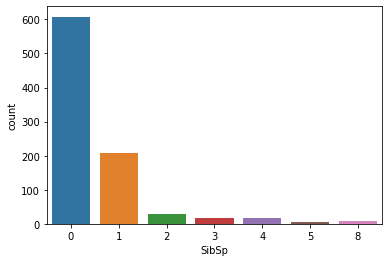

In [11]:
sns.countplot(titanic['SibSp'])
plt.show()

### <span style="color:blue"> 6. Keep only top 2 most frequent values as it is and replace everything else as ‘Other’ in ‘Embarked’ column of titanic dataset </span>

In [12]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
dic = {'S':'S','C':'C','Q':'Other'}

In [14]:
titanic['Embarked'] = titanic['Embarked'].map(dic)

In [15]:
titanic['Embarked'].value_counts()

S        644
C        168
Other     77
Name: Embarked, dtype: int64

##### Alternate approach

In [19]:
# This approach will calculate for null values as well
titanic = titanic_original.copy()

titanic['Embarked'] = titanic['Embarked'].map(lambda x : x if x in(['S','C']) else 'Other')

In [20]:
titanic['Embarked'].value_counts()

S        644
C        168
Other     79
Name: Embarked, dtype: int64

### <span style="color:blue"> 7.  Bin the price column in titanic data set into 5 equal groups and get counts of each bin </span>

In [26]:
titanic = titanic_original.copy()
titanic['AgeBins'] = pd.qcut(titanic['Age'],5)
titanic['AgeBins'].value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: AgeBins, dtype: int64

### <span style="color:blue"> 8. Count the number of missing values in each column? </span>

In [27]:
titanic = titanic_original.copy()
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <span style="color:blue"> 9. Get the row number of the 5th largest value in the Age column of titanic dataset? </span>

In [47]:
titanic = titanic_original.copy()
index = titanic['Age'].sort_values(ascending=False).index[4]
print(f"Row number of the 5th largest value in the Age column of titanic dataset is {index}")

Row number of the 5th largest value in the Age column of titanic dataset is 116


In [48]:
titanic.iloc[index]

PassengerId                     117
Survived                          0
Pclass                            3
Name           Connors, Mr. Patrick
Sex                            male
Age                            70.5
SibSp                             0
Parch                             0
Ticket                       370369
Fare                           7.75
Cabin                           NaN
Embarked                          Q
Name: 116, dtype: object

### <span style="color:blue"> 10 Normalize all columns in a dataframe?

In [50]:
def normalize(x):
    return (x - np.mean(x))/np.std(x)

In [51]:
titanic.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object>

In [60]:
titanic_num_columns = titanic.select_dtypes(exclude='O').columns

In [62]:
titanic[titanic_num_columns]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [63]:
titanic_normalized = titanic[titanic_num_columns].apply(lambda x: normalize(x))

In [64]:
titanic_normalized

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-0.530377,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,0.571831,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-0.254825,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,0.365167,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.365167,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,NaN,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381
